Sources :

    https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/6785036-entrainez-vous-a-entrainer-un-algorithme-de-machine-learning
    
    https://seaborn.pydata.org/tutorial/distributions.html
    
    https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html
    
    

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
from scipy.stats import kurtosis,skew 

    

from ipywidgets import HTML,widgets



In [2]:
for item in mpl.rc_params() :
    if "size" in item : 
        print(item)

agg.path.chunksize
axes.labelsize
axes.titlesize
boxplot.flierprops.markersize
boxplot.meanprops.markersize
errorbar.capsize
figure.figsize
figure.titlesize
font.size
legend.fontsize
legend.title_fontsize
lines.markersize
ps.papersize
xtick.labelsize
xtick.major.size
xtick.minor.size
ytick.labelsize
ytick.major.size
ytick.minor.size


In [3]:
#mpl.rc_params()["xtick.labelsize"] = mpl.rc_params()["ytick.labelsize"] = "small"


In [4]:
def describeNumCol (df,colName) :
    """
    describe a numeric column with basic stats and graphics
    """

    dist_series = df[colName].value_counts()
    n = len(df[colName])

    #calculate sample kurtosis
    gamma1 = kurtosis(df[colName].dropna(), bias=False)
    #The kurtosis of a normal distribution is 3.
    #kurtosis less than 3 : playkurtic, which means it tends to produce fewer and less extreme outliers than the normal distribution.
    #kurtosis greater than 3, : leptokurtic, which means it tends to produce more outliers than the normal distribution.
    if gamma1 <2.9 : 
        interp_gamma1 =  "playkurtic (concentrated)"
    elif gamma1 >3.1 :
        interp_gamma1 =  "leptokurtic (many outliers)"
    else : 
        interp_gamma1 = "distribution is normal"

    #calculate sample skewness
    gamma2 = skew(df[colName].dropna(), bias=False)
    #A negative skew = the tail is on the left side of the distribution, which extends towards more negative values.
    #A positive skew = the tail is on the right side of the distribution, which extends towards more positive values.
    #A value of zero = there is no skewness in the distribution at all, meaning the distribution is perfectly symmetrical.
    if gamma2 <-0.1 : 
        interp_gamma2 =  "tail is on the left side of the distribution"
    elif gamma2 >0.1 :
        interp_gamma2 =  "tail is on the right side of the distribution"
    else : 
        interp_gamma2 = "distribution is symmetrical"


    #calculate Lorentz and Gini  
    lorenz = np.cumsum(np.sort(df[colName].dropna())) / df[colName].dropna().sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    gini = 2*S
    gini


    #prepare outputs
    graph = widgets.Output()
    table = widgets.Output(layout=widgets.Layout(margin='0 50px 0 0'))
    hLayout = widgets.HBox([table,graph])


    fig,ax = plt.subplots(figsize=(20,15) )
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    plt.title(f"Variable {colName}",
                fontdict={
                    'fontsize': 24,
                    'fontweight' : "bold" ,
                    'verticalalignment': 'baseline',
                    'horizontalalignment': 'center'},
                pad =50,
                )

    # grid specification
    gs = fig.add_gridspec(2,2)
    ax1 = fig.add_subplot(gs[0, 0])

    ax2 = fig.add_subplot(gs[1, 0])
    ax2.sharex = ax1

    ax3 = fig.add_subplot(gs[0, 1])
    ax3.sharey = ax1



    # axe 1 ---------------------------------------------
    
    sns.histplot(df[colName], kde=False,ax=ax1)
    ax1.axvline(0, color="k", linestyle="--")
    ax1.axvline(df[colName].mean(), color="r", linestyle="-")
    ax1.axvline(df[colName].std(), color="b", linestyle="-")
    
    ax1.set_title('Distribution of values')
    ax1.set_ylabel("Nb observations")
    ax1.xaxis.set_tick_params(rotation=45)



    # axe 2 ---------------------------------------------
    sns.boxplot(x=df[colName], ax =ax2,notch=True,color=(1,0,1,0.5))
    ax2.set_xlabel(colName)
    ax2.set_title('Distribution of values Boite a mous')


    # axe 3 -----------------------------------------------

    xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #one segment of len n for each individual + 1 additional segment at the origine 0. 
    #first segment starts at 0-1/n, las ends at 1+1/n.
    ax3.plot(xaxis,lorenz,drawstyle='steps-post')
    ax3.plot([0,1], [0,1]) #bisector
    ax3.set_title('Lorentz distribution')



    # display ---------------------------------------------

    with graph :
        graph.clear_output()
        plt.show()
    with table :
        table.clear_output()
        full_desc = df[[colName]].describe()
        full_desc.loc["Unique values"] = n 
        full_desc.loc["Missing values%"] = f"{100*df[colName].isna().sum()/len(df[colName]):.2f}"
        full_desc.loc["Kurtosis"] = gamma1
        full_desc.loc["Kurto desc"] = interp_gamma1
        full_desc.loc["Skew"] = gamma2
        full_desc.loc["Skew desc"] = interp_gamma2
        full_desc.loc["Gini"] = gini

        display(HTML(full_desc.to_html()))


    display(hLayout)

In [5]:
df = pd.read_csv("house/house_data.csv")
display(HTML(f"<h4>Shape : {df.shape}"))
display(df.head(5))

HTML(value='<h4>Shape : (827, 3)')

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [6]:
for colName in df.columns : 

    describeNumCol(df,colName)

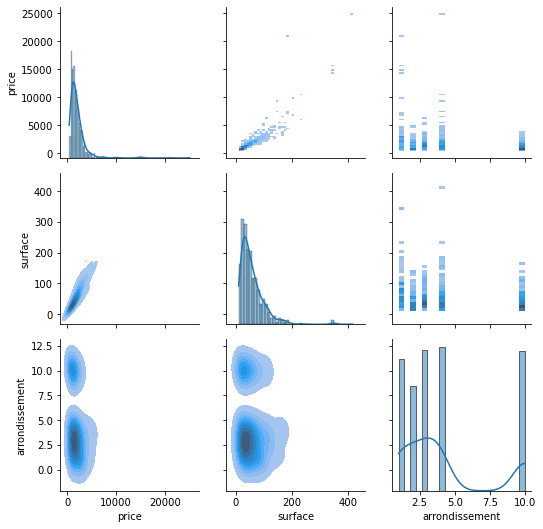

In [11]:
g = sns.PairGrid(df1)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

<AxesSubplot:xlabel='surface', ylabel='price'>

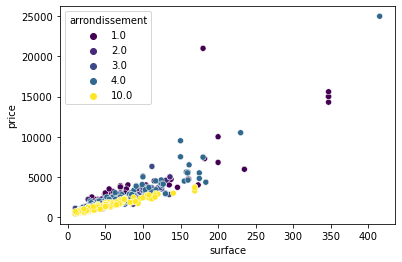

In [7]:
df1 = df.dropna(inplace=False)
sns.scatterplot(x=df1.surface,y=df1.price,hue=df1.arrondissement,palette="viridis")

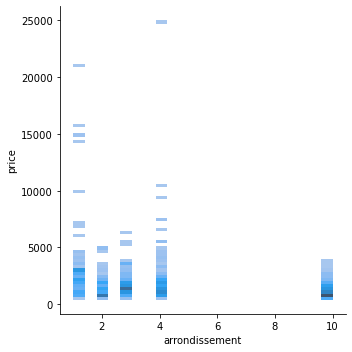

In [8]:

sns.displot(df1,y="price",x="arrondissement")


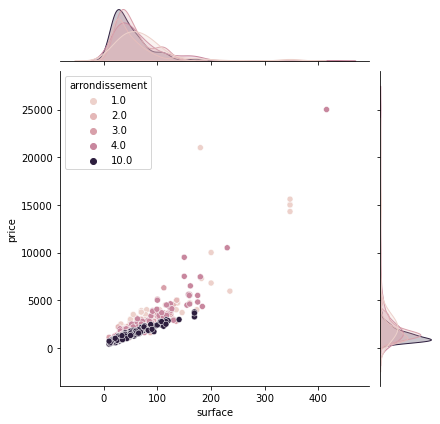

In [9]:
sns.jointplot(data =df1,y="price",x="surface",hue="arrondissement")

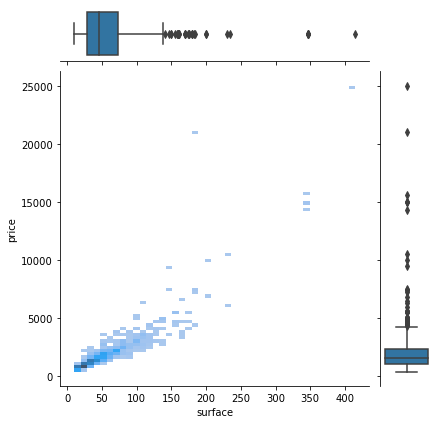

In [10]:
g = sns.JointGrid(data=df1, x="surface", y="price")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

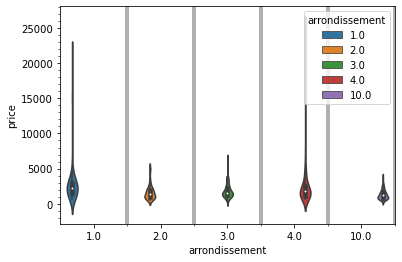

In [12]:
from matplotlib.ticker import AutoMinorLocator
ax1 = sns.violinplot( data=df,x="arrondissement",y="price",hue="arrondissement")
ax1.minorticks_on()
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.grid(which='minor', axis='x', linewidth=4)

<IPython.core.display.Javascript object>


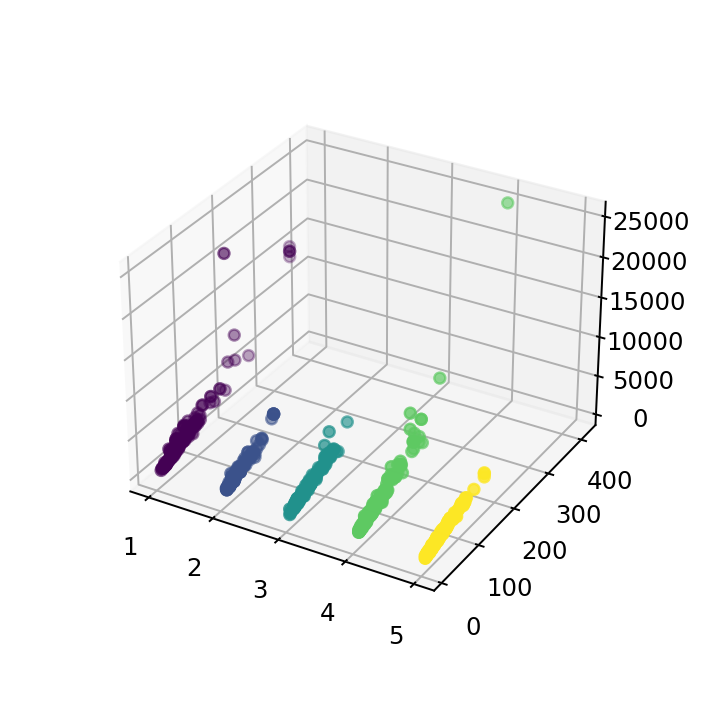

In [80]:
fig = plt.figure(figsize=(4,4) )

ax = fig.add_subplot(111, projection='3d')

#plt.plot(df1.arrondissement,df1.surface,df1.price,c=df1.arrondissement.astype(int))

# Pour faciliter la visualisation, on va changer la valeur de l'arrondissement (10)
tmp_arr = df1['arrondissement'][:]
tmp_arr[tmp_arr == 10] = 5

ax.scatter(tmp_arr, df1['surface'], df1['price'], c=tmp_arr, cmap="viridis")
plt.show()

lets remove outliers

In [14]:
df2 = df1[df1["price"] < 10000]

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [44]:
regr = linear_model.LinearRegression()

Xtrain,Xtest,ytrain,ytest = train_test_split(df2[["surface","arrondissement"]], df2.price, train_size=0.8)
regr.fit(Xtrain, ytrain)
ypred = regr.predict(Xtest)

In [45]:
error = 1 - regr.score(Xtest,ytest)
print(f"""error : {100*error:.2f}% *
coef and intercep :      {regr.coef_,regr.intercept_}

*error : Ordinary Least Squares  
Residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
""")

error : 13.51% *
coef and intercep :      (array([ 28.48424535, -90.94065952]), 554.6374763395334)

*error : Ordinary Least Squares  
Residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.



In [49]:
%matplotlib notebook

<IPython.core.display.Javascript object>


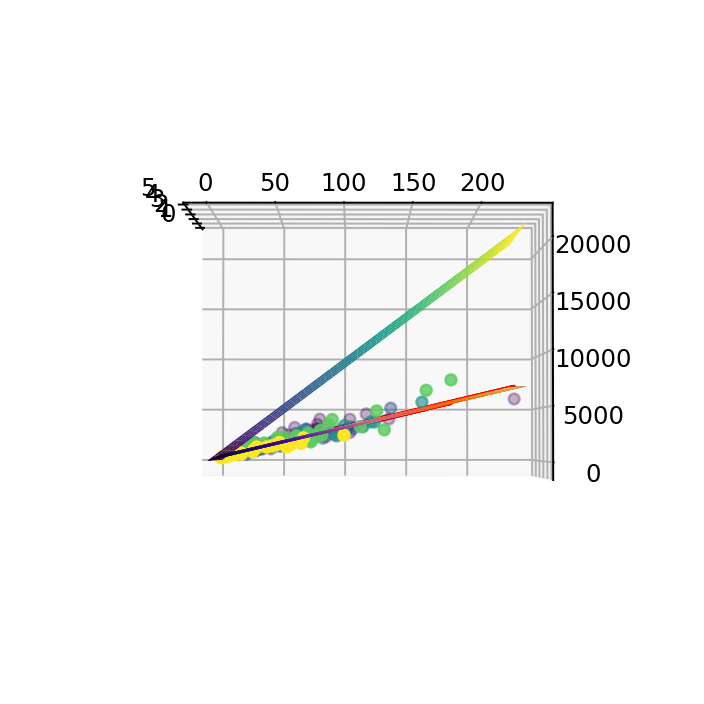

In [191]:
fig = plt.figure(figsize=(4,4) )

ax = fig.add_subplot(111, projection='3d')

tmp_arr = Xtest.arrondissement.astype(int)[:]

ax.scatter(tmp_arr,Xtest.surface,ytest,'bo',c=tmp_arr)

ax.plot(tmp_arr,Xtest.surface,regr.predict(Xtest),'-',color='r')

x_surf=np.arange(0, tmp_arr.max()+1, 1)                # generate a mesh
y_surf=np.arange(0, Xtest.surface.max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = regr.coef_[0]*x_surf - regr.coef_[1]*y_surf  # function using regr coef 

ax.plot_surface(x_surf, y_surf, z_surf, cmap="viridis");    # plot a 3d surface plot



In [108]:
[x_surf,y_surf]

[array([0, 1, 2, 3, 4]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143.,

In [124]:
z_surf[0],x_surf[0],y_surf[0],z_surf[1],x_surf[1],y_surf[1]

(array([  0.        ,  28.48424535,  56.9684907 ,  85.45273606,
        113.93698141, 142.42122676]),
 array([0, 1, 2, 3, 4, 5]),
 array([0., 0., 0., 0., 0., 0.]),
 array([ 90.94065952, 119.42490488, 147.90915023, 176.39339558,
        204.87764093, 233.36188629]),
 array([0, 1, 2, 3, 4, 5]),
 array([1., 1., 1., 1., 1., 1.]))

In [195]:
a = pd.DataFrame()
b = []

# carefull with x and y must be surface and arrondissent (the order matters !!!)

for i in range (len(x_surf)) :
    a2 = pd.DataFrame(y_surf[i])
    a2.loc[:,"arr"] = x_surf[i]
    
    z_stuf = regr.predict(a2)
    b.append(z_stuf)
    
    a = a.append(a2)

z_stuf = np.asarray(b)
ax.plot_surface(x_surf, y_surf, z_stuf, cmap="inferno");    # plot a 3d in the previous figure


<div class = "alert alert-bloc alert-danger"> WTF la surface avec les coef de reg != la surface attendue 

In [68]:
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
X

array([[-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       ...,
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75],
       [-5.  , -4.75, -4.5 , ...,  4.25,  4.5 ,  4.75]])

368     734.379693
383    1471.380256
474    1414.687905
535    2415.307900
458     507.610289
          ...     
658    1981.611415
272    1528.072607
787     309.187061
607    1102.879974
120    3228.843136
Name: surface, Length: 163, dtype: float64

[]

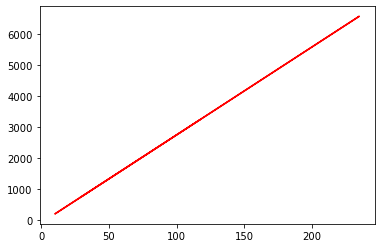

In [19]:
def test (x) :
    return regr.coef_[0]*x + regr.coef_[1]
display(Xtest.surface.apply(test))
plt.plot(Xtest.surface,Xtest.surface.apply(test),'-',color='r',)
plt.plot()

In [20]:
Xtest.surface.apply(test) - regr.predict(Xtest)

368   -386.595514
383   -386.595514
474   -298.936118
535   -298.936118
458   -386.595514
          ...    
658   -211.276722
272   -474.254910
787   -211.276722
607   -298.936118
120   -561.914306
Name: surface, Length: 163, dtype: float64

<div class = "alert alert-bloc alert-danger"> WTF !!! predict != calc avec coef

In [25]:
X = []
regr = []
score = []

for arr in df2["arrondissement"].unique() :

    filt = df2["arrondissement"] == arr
    X.append(df2[filt])
    
    xtrain,xtest,ytrain,ytest = train_test_split( X[-1].drop(columns="price"),X[-1].price,test_size=0.2)
    
    regr.append(linear_model.LinearRegression())
    regr[-1].fit(xtrain,ytrain)
    
    X[-1].loc[:,"pred_price"] = regr[-1].predict(X[-1].drop(columns="price"))
    X[-1].loc[ytrain.index,"type"] = "train"
    X[-1].loc[ytest.index,"type"] = "test"
    
    score.append(regr[-1].score(xtest,ytest))
    



/home/zak/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/home/zak/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/zak/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [26]:
X

[     price  surface  arrondissement   pred_price   type
 0     1820     46.1             1.0  1763.924499  train
 1     1750     41.0             1.0  1629.931405  train
 2     1900     55.0             1.0  1997.755585  train
 3     1950     46.0             1.0  1761.297184  train
 4     1950     49.0             1.0  1840.116651  train
 ..     ...      ...             ...          ...    ...
 160   1940     40.0             1.0  1603.658250   test
 161   1490     55.0             1.0  1997.755585  train
 162   2020     58.0             1.0  2076.575053  train
 163   2050     70.0             1.0  2391.852921  train
 164   1610     44.0             1.0  1708.750872  train
 
 [157 rows x 5 columns],
      price  surface  arrondissement   pred_price   type
 165   1850    38.00             2.0  1383.467369  train
 166   1885    51.00             2.0  1780.396310  train
 167   2000    40.00             2.0  1444.533360  train
 168   2100    46.00             2.0  1627.731333  train
 169

<IPython.core.display.Javascript object>


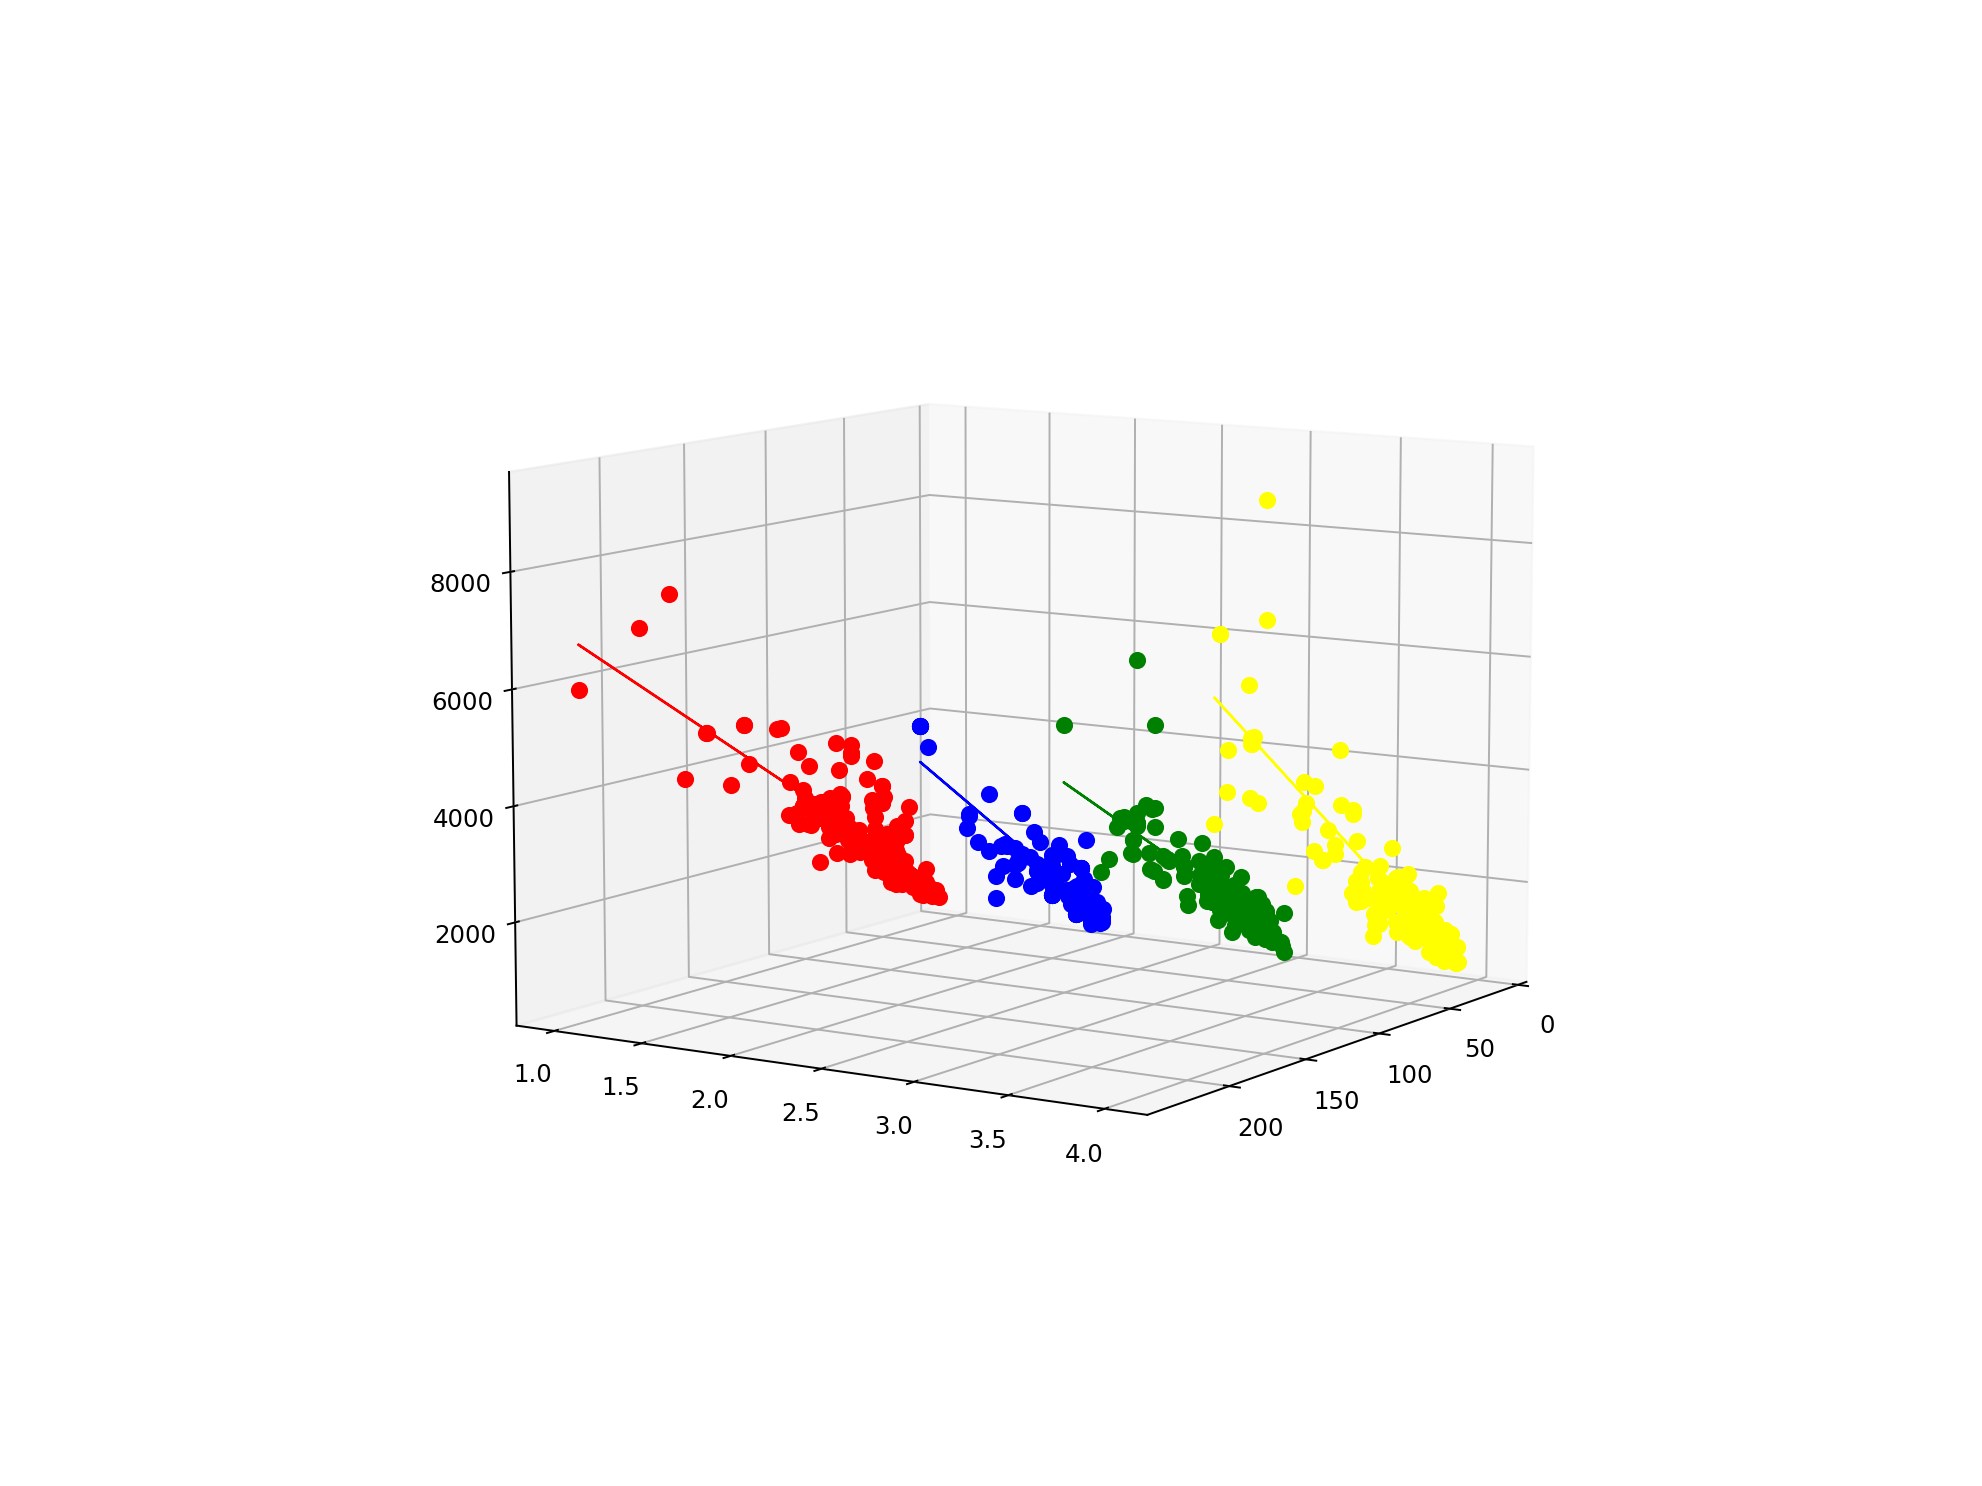

/tmp/ipykernel_7747/1515002967.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(X[arr].surface,X[arr].arrondissement,X[arr].price,'bo',color=color)
/tmp/ipykernel_7747/1515002967.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(X[arr].surface,X[arr].arrondissement,X[arr].price,'bo',color=color)
/tmp/ipykernel_7747/1515002967.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(X[arr].surface,X[arr].arrondissement,X[arr].price,'bo',color=color)
/tmp/ipykernel_7747/1515002967.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take pr

In [54]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



for arr,color in zip(range(len(X)),('r','b','g',"yellow")) :

    ax.plot(X[arr].surface,X[arr].arrondissement,X[arr].price,'bo',color=color)
    ax.plot(X[arr].surface,X[arr].arrondissement,X[arr].pred_price,linewidth=1,color=color)

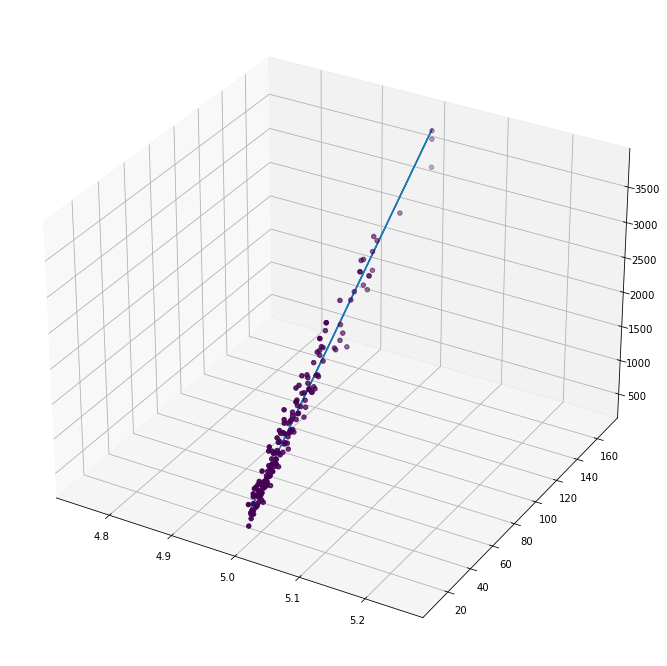

In [40]:
ax.scatter(X[-1].arrondissement, X[-1].surface, X[-1].price, c=X[-1].arrondissement, cmap="viridis")
ax.plot(X[-1].arrondissement, X[-1].surface, X[-1].pred_price) 


plt.show()